In [1]:
from loica import *
import matplotlib.pyplot as plt

In [88]:
osc = GeneticNetwork()

araC = Regulator(name='AraC', degradation_rate=2)
osc.add_regulator(araC)

lacI = Regulator(name='LacI', degradation_rate=0.4)
osc.add_regulator(lacI)

reporters = [Reporter(name=f'SFP{i}', color='blue', degradation_rate=1) for i in range(2)]
osc.add_reporters(reporters)

op1 = Hill2([lacI,araC], [araC, reporters[0]], alpha=[1e2,0,2e4,0], K=[1e2,1e2], n=[4,4])
op2 = Hill2([lacI,araC], [lacI, reporters[1]], alpha=[1e2,0,2e4,0], K=[1e2,1e2], n=[4,4])
osc.add_operators([op1,op2])

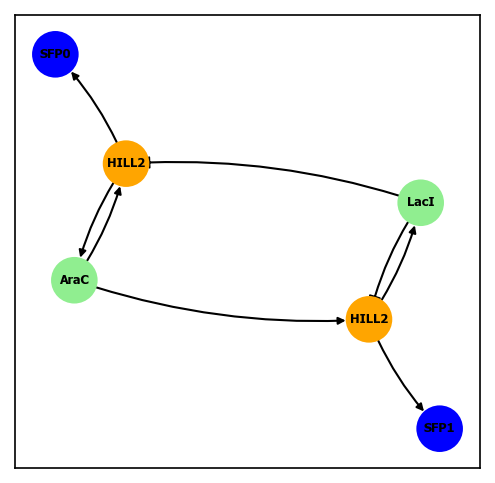

In [89]:
plt.figure(figsize=(4,4), dpi=150)
osc.draw(contracted=False, arrowsize=7, node_size=500, linewidths=0, alpha=1)

In [90]:
def growth_rate(t):
    return 0 # gompertz_growth_rate(t, 0.01, 1, 1, 2)

def biomass(t):
    return 1 # gompertz(t, 0.01, 1, 1, 2)

metab = SimulatedMetabolism(biomass, growth_rate)

In [91]:
araC.init_concentration = 0
lacI.init_concentration = 100
reporters[0].init_concentration = 100

In [92]:
sample = Sample(genetic_network=osc, 
                    metabolism=metab)

In [93]:
sample.initialize()
rep1 = []
rep2 = []
for t in range(5000):
    sample.step(0, 1e-2, stochastic=True)
    reporters = sample.reporters
    rep1.append(reporters[0].concentration)
    rep2.append(reporters[1].concentration)

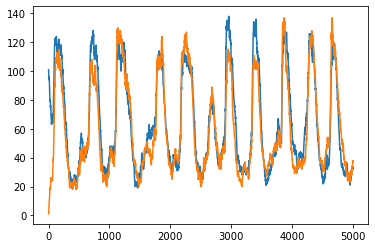

In [94]:
plt.plot(rep1)
plt.plot(rep2)
plt.plot(rep3)

In [78]:
assay = Assay([sample], 
              n_measurements=100, 
              interval=0.24,
              name=f'Loica Stricker oscillator',
              description='Simulated oscillator generated by loica'
             )
assay.run()

100%|██████████████████████████████████████████████████████████| 100.0/100 [00:00<00:00, 111.45it/s]


In [ ]:
m = assay.measurements
fig,ax = plt.subplots(1,1)
for i in range(2):
    m[m.Signal==f'SFP{i}'].plot(x='Time', y='Measurement', style='-', ax=ax)
plt.legend([f'SFP{i}' for i in range(3)])

In [ ]:
col = Colony(circuit=osc, r0=10)

In [ ]:
kymo = col.map_kymo(col.kymograph(500, 0, 24))

In [ ]:
kymo.shape

In [ ]:
plt.imshow(kymo)